In [18]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
from helpers import verify_worksheet, replace_nulls, sum_features_per_software, keep_top_software

In [20]:
# 1. READ EXCEL FILE
x_file = 'SRsoftwareextraction.xlsx'
sheet_name = 'data00'

verify_worksheet(x_file, sheet_name)
orig_df = pd.read_excel(x_file, sheet_name, engine='openpyxl')
replace_nulls(orig_df)

In [21]:
# Drop empty rows
orig_df.dropna(axis=0, how= 'all', thresh=None, subset=None, inplace=True)
orig_df.tail()

orig_df.to_excel('orig_df.xlsx')

In [22]:
# SUMMARIZE ALL DATA

In [28]:
sum_df = sum_features_per_software(orig_df, 5) # Keep if there are at least 5 non-null features
sum_df.tail()

,name,type,field,search,import,expertaddition,tiabscreen,distinctscreen,dualscreen,fulltextpdf,...,cloud,living,training,support,flexibilty,publicouputs,riskofbias,total_features,number_of_features,percent_of_features
19,SRDR,data extraction,multidiscipline,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,32,18.0,0.56
20,SWIFT-Active Screener,screening,multidiscipline,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,32,19.0,0.59
21,SWIFT-Review,other,multidiscipline,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32,3.0,0.09
22,SyRF,full process,healthcare,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32,10.0,0.31
23,SysRev,full process,multidiscipline,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,32,24.0,0.75


In [31]:
# Keep only the top 8 softwares
df = keep_top_software(sum_df, "number_of_features", 8)
df.tail()

testing again


,name,type,field,search,import,expertaddition,tiabscreen,distinctscreen,dualscreen,fulltextpdf,...,cloud,living,training,support,flexibilty,publicouputs,riskofbias,total_features,number_of_features,percent_of_features
11,SWIFT-Active Screener,screening,multidiscipline,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,32,19.0,0.59
12,SRDR,data extraction,multidiscipline,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,32,18.0,0.56
13,Abstrackr,screening,healthcare,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,32,17.0,0.53
14,RobotAnalyst,screening,healthcare,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,32,16.0,0.50
15,Data Abstraction Assistant,extraction,healthcare,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,32,13.0,0.41


In [32]:
name = df['name']
percent = df['percent_of_features']
number = df['number_of_features']

captions = []

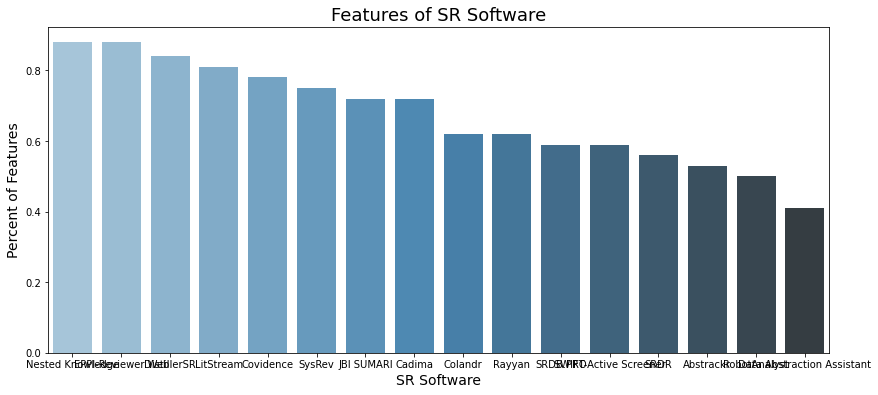

In [33]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=name, y=percent, data=sum_df, palette="Blues_d")
ax.set_ylabel('Percent of Features', fontsize=14)
ax.set_xlabel('SR Software', fontsize=14)
ax.set_title('Features of SR Software', fontsize=18)
plt.show()

captions.append("fig 1. "+"Percent of Features for each SR Software (with a min of 5 non-NA features)")
ax.get_figure().savefig('fig1.png')

In [27]:
# Export original dataframe to breakup by feature class.

In [34]:
# Write all the figure captions to a text file
with open('captions.txt', 'w') as f:
    for line in captions:
        f.write(line)
        f.write('\n')

testing again


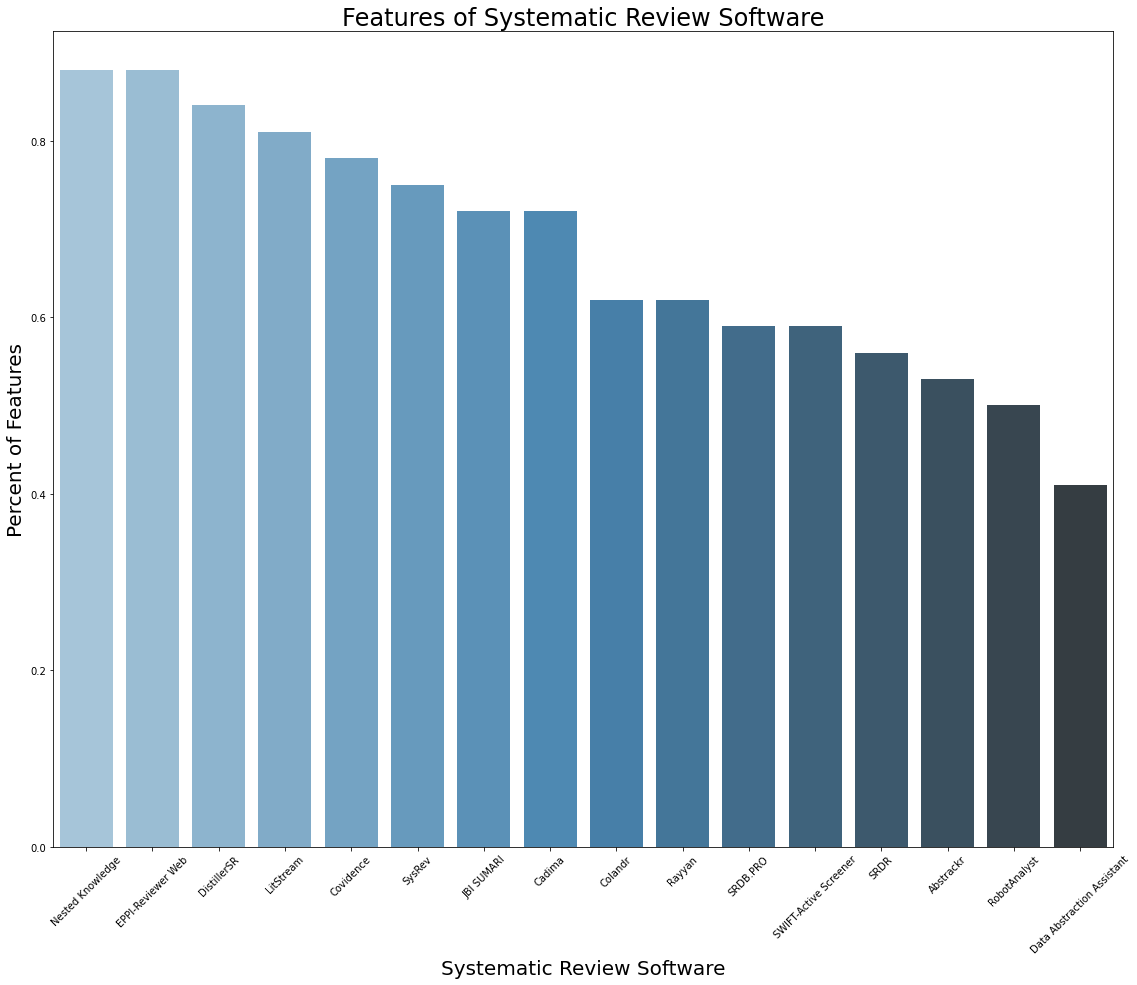

In [49]:
# KEEP THE TOP 16
# Keep only the top 8 softwares
df = keep_top_software(sum_df, "number_of_features", 16)
df.tail()

name = df['name']
percent = df['percent_of_features']
number = df['number_of_features']

plt.figure(figsize=(19, 15))
ax = sns.barplot(x=name, y=percent, data=sum_df, palette="Blues_d")
ax.set_ylabel('Percent of Features', fontsize=20)
ax.set_xlabel('Systematic Review Software', fontsize=20)
ax.set_title('Features of Systematic Review Software', fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

captions.append("fig 8. "+"Percent of Features for each SR Software (with a min of 5 non-NA features)")
ax.get_figure().savefig('fig8.png')
